### Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif



### Loading excel/csv files

In [2]:
application_rec = pd.read_csv('application_record.csv')
application_rec.loc[(application_rec['CNT_CHILDREN']== 0)  , 'y'] = '0'
application_rec.loc[(application_rec['CNT_CHILDREN']> 1) & (application_rec['CNT_CHILDREN']<= 3) , 'y'] = '1-3'
application_rec.loc[(application_rec['CNT_CHILDREN']> 3) & (application_rec['CNT_CHILDREN']<= 6) , 'y'] = '4-6'
application_rec.loc[(application_rec['CNT_CHILDREN']> 6) & (application_rec['CNT_CHILDREN']<= 10), 'y'] = '7-10'
application_rec.loc[(application_rec['CNT_CHILDREN'] > 10) , 'y'] = 'up10'
application_rec
application_rec.loc[(application_rec['y']== 'up10')]


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,y
20436,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15,up10
20437,5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15,up10
20438,5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15,up10
36383,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20,up10
208904,5931568,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14,up10
208905,5931569,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14,up10
208906,5931570,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14,up10
208907,5931571,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14,up10


### Check correlation between two columns

In [3]:





# Create two arrays of data
x = application_rec['CNT_CHILDREN']
y = application_rec['CNT_FAM_MEMBERS']

# Calculate the Pearson correlation coefficient
corr, pval = stats.pearsonr(x, y)

# Print the result
print(f"Pearson correlation coefficient: {corr}")

Pearson correlation coefficient: 0.8847821164512084


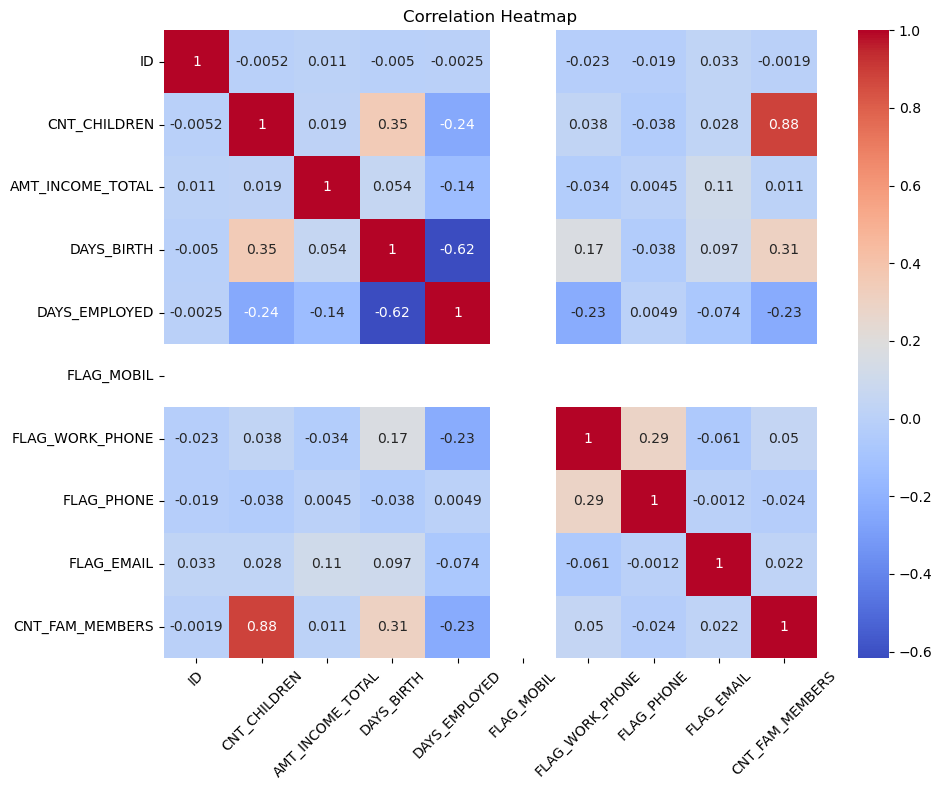

In [4]:
# Create a correlation matrix
corr_matrix = application_rec.corr()

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### Head

In [5]:
y

0         2
1         2
2         2
3         1
4         1
         ..
438547    1
438548    1
438549    1
438550    2
438551    2
Name: CNT_FAM_MEMBERS, Length: 438552, dtype: int64

In [6]:
application_rec.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,y
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,0


### Changing M to 1 and women to 0, also changing Y to 1 and N to 0

In [7]:
application_rec['CODE_GENDER'] = application_rec['CODE_GENDER'].replace({'M': 1, 'F': 0})
application_rec['FLAG_OWN_CAR'] = application_rec['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
application_rec['FLAG_OWN_REALTY'] = application_rec['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})

### division with 365

In [8]:
application_rec['AGE']=-(application_rec['DAYS_BIRTH'])//365
application_rec['employment_status'] = application_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x < 0 else 0)

In [9]:
application_rec['employment_status']

0         1
1         1
2         1
3         1
4         1
         ..
438547    0
438548    1
438549    1
438550    0
438551    1
Name: employment_status, Length: 438552, dtype: int64

In [10]:
application_rec['AGE']

0         32
1         32
2         58
3         52
4         52
          ..
438547    62
438548    43
438549    22
438550    59
438551    51
Name: AGE, Length: 438552, dtype: int64

### Remove children count

In [11]:
application_rec = application_rec.drop(['CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','ID'], axis=1)

In [12]:
application_rec.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status
0,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,0,32,1
1,1,1,1,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,0,32,1
2,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,0,58,1
3,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,52,1
4,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,52,1


### Info on data and removing blanks

In [13]:
application_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438552 entries, 0 to 438551
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438552 non-null  int64  
 1   FLAG_OWN_CAR         438552 non-null  int64  
 2   FLAG_OWN_REALTY      438552 non-null  int64  
 3   AMT_INCOME_TOTAL     438552 non-null  float64
 4   NAME_INCOME_TYPE     438552 non-null  object 
 5   NAME_EDUCATION_TYPE  438552 non-null  object 
 6   NAME_FAMILY_STATUS   438552 non-null  object 
 7   NAME_HOUSING_TYPE    438552 non-null  object 
 8   FLAG_MOBIL           438552 non-null  int64  
 9   FLAG_WORK_PHONE      438552 non-null  int64  
 10  FLAG_PHONE           438552 non-null  int64  
 11  FLAG_EMAIL           438552 non-null  int64  
 12  OCCUPATION_TYPE      304350 non-null  object 
 13  y                    350026 non-null  object 
 14  AGE                  438552 non-null  int64  
 15  employment_status

### Dropped all N/A values 

In [14]:
application_rec = application_rec.dropna()

In [15]:
application_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231221 entries, 2 to 438551
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          231221 non-null  int64  
 1   FLAG_OWN_CAR         231221 non-null  int64  
 2   FLAG_OWN_REALTY      231221 non-null  int64  
 3   AMT_INCOME_TOTAL     231221 non-null  float64
 4   NAME_INCOME_TYPE     231221 non-null  object 
 5   NAME_EDUCATION_TYPE  231221 non-null  object 
 6   NAME_FAMILY_STATUS   231221 non-null  object 
 7   NAME_HOUSING_TYPE    231221 non-null  object 
 8   FLAG_MOBIL           231221 non-null  int64  
 9   FLAG_WORK_PHONE      231221 non-null  int64  
 10  FLAG_PHONE           231221 non-null  int64  
 11  FLAG_EMAIL           231221 non-null  int64  
 12  OCCUPATION_TYPE      231221 non-null  object 
 13  y                    231221 non-null  object 
 14  AGE                  231221 non-null  int64  
 15  employment_status

In [16]:
application_rec.sample(20)
rec=y

In [17]:
application_rec.reset_index(inplace=True)
application_rec

,index,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status
0,2,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,0,58,1
1,3,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,52,1
2,4,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,52,1
3,5,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,52,1
4,6,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,0,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231216,438531,0,0,0,90000.0,State servant,Higher education,Single / not married,House / apartment,1,0,0,0,Core staff,1-3,44,1
231217,438536,1,0,1,202500.0,Working,Higher education,Civil marriage,House / apartment,1,1,0,0,Laborers,0,37,1
231218,438548,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,0,43,1
231219,438549,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1,1,0,0,Sales staff,0,22,1


# heatmap 

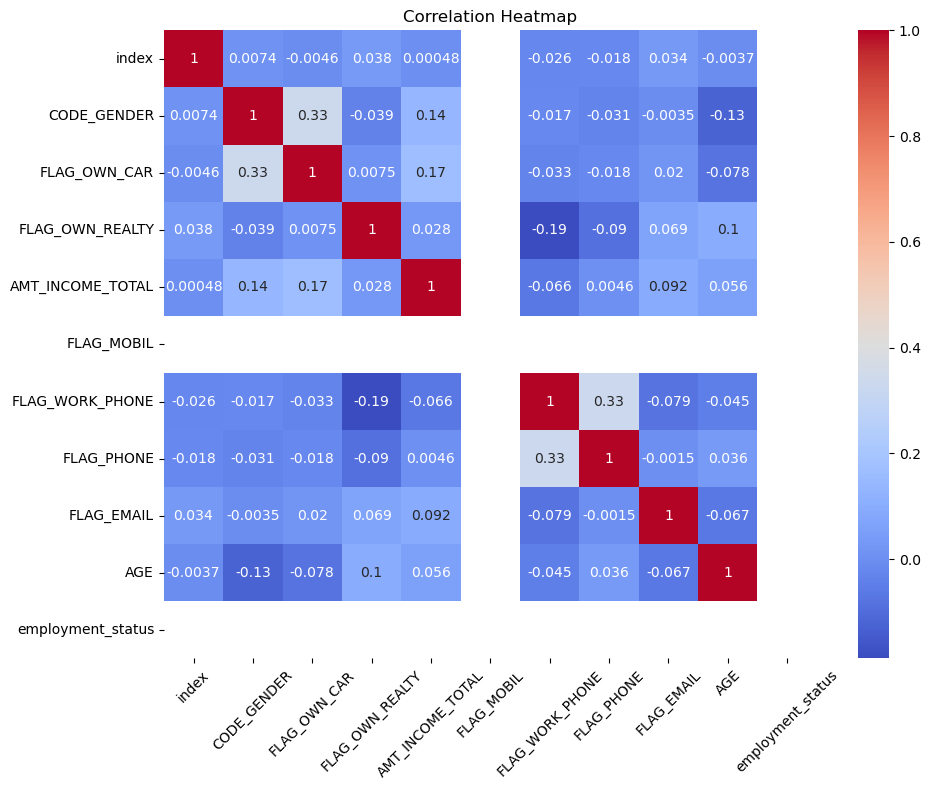

In [18]:
# Create a correlation matrix
corr_matrix = application_rec.corr()

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### kfold =5

In [19]:
kf = StratifiedKFold(n_splits=10)

### Crearting lists to hold scores of each model

In [20]:




knn_TP = []
knn_FP=[]
knn_FN= []
knn_TN= []

rf_TP = []
rf_FP=[]
rf_FN= []
rf_TN= []

lr_TP = []
lr_FP=[]
lr_FN= []
lr_TN= []

gb_TP = []
gb_FP=[]
gb_FN= []
gb_TN= []

y=application_rec['y']
x=application_rec.drop('y', axis=1)

In [21]:
x=x.drop('index', axis=1)

In [22]:
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,AGE,employment_status
0,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,58,1
1,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,52,1
2,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,52,1
3,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,52,1
4,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231216,0,0,0,90000.0,State servant,Higher education,Single / not married,House / apartment,1,0,0,0,Core staff,44,1
231217,1,0,1,202500.0,Working,Higher education,Civil marriage,House / apartment,1,1,0,0,Laborers,37,1
231218,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,43,1
231219,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1,1,0,0,Sales staff,22,1


In [23]:
t=x
t["y"]=y

t.to_csv("Data_For_Clustering.csv")

In [24]:
y=pd.DataFrame(y)
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
231216,1-3
231217,0
231218,0
231219,0


### Creating constructors for the different models

In [25]:
rf_model = RandomForestClassifier(random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=3)
lr_model= LogisticRegression()
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [26]:
def create_empty_c_matrix_dictionary(empty_dict,labels):

    for i,label in enumerate(labels):
        empty_dict[label]={}
        empty_dict[label]['TN']=[]
        empty_dict[label]['FP']=[]
        empty_dict[label]['FN']=[]
        empty_dict[label]['TP']=[]

def append_to_c_matrix(dict_model,y_true,y_pred,labels):
    ans=multilabel_confusion_matrix(y_true, y_pred,
                             labels=labels)
    for i,label in enumerate(labels):
            dict_model[label]['TN'].append(ans[i][0][0])
            dict_model[label]['FP'].append(ans[i][0][1])
            dict_model[label]['FN'].append(ans[i][1][0])
            dict_model[label]['TP'].append(ans[i][1][1])
    
        



In [27]:
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list=[]

labels=['0','1-3','4-6','7-10','up10']

knn_c_matrix={}
rf_c_matrix={}
lr_c_matrix={}
gb_c_matrix={}
create_empty_c_matrix_dictionary(knn_c_matrix,labels)
create_empty_c_matrix_dictionary(rf_c_matrix,labels)
create_empty_c_matrix_dictionary(lr_c_matrix,labels)
create_empty_c_matrix_dictionary(gb_c_matrix,labels)

for train_index,test_index in kf.split(x,y):
    print("Entering loop..")
    expected_classes = np.arange(25)
    X_train,X_test,y_train, y_test = x.loc[train_index],x.loc[test_index], y.loc[train_index], y.loc[test_index]
    cols_to_encode = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder.fit(X_train[cols_to_encode])
    X_train_encoded = encoder.transform(X_train[cols_to_encode])
    X_test_encoded = encoder.transform(X_test[cols_to_encode])
    cols_to_encode_std = ['AMT_INCOME_TOTAL', 'AGE']
    
    scaler = StandardScaler()
    scaler.fit(X_train[cols_to_encode_std])
    X_train=scaler.transform(X_train[cols_to_encode_std])
    X_test=scaler.transform(X_test[cols_to_encode_std])
        
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    
    knn_model.fit(X_train, y_train)
    knn_y_pred=knn_model.predict(X_test)
    append_to_c_matrix(knn_c_matrix,y_test,knn_y_pred,labels)


    rf_model.fit(X_train, y_train)
    rf_y_pred=rf_model.predict(X_test)
    append_to_c_matrix(rf_c_matrix,y_test,rf_y_pred,labels)
    

    lr_model.fit(X_train, y_train)
    lr_y_pred=lr_model.predict(X_test)
    append_to_c_matrix(lr_c_matrix,y_test,lr_y_pred,labels)

    
    gb_model.fit(X_train, y_train)
    gb_y_pred=gb_model.predict(X_test)
    append_to_c_matrix(gb_c_matrix,y_test,gb_y_pred,labels)
  

C:\Users\shula\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

Entering loop..


C:\Users\shula\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\980899708.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shula\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

In [28]:

labels=['0','1-3','4-6','7-10','up10']
def calculate_performance(tp, tn, fp, fn):
    # Calculate total samples
    total_samples = tp + tn + fp + fn

    # Calculate accuracy
    accuracy = (tp + tn) / total_samples

    # Calculate precision, recall, and F1 score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    tpr = recall
    fpr = fp / (fp + tn)
    # Calculate Area Under the ROC Curve (AUC)
    roc_curve = np.array([(0, 0), (fpr, recall), (1, 1)])
    sorted_indices = np.argsort(roc_curve[:, 0])
    sorted_curve = roc_curve[sorted_indices]
    auc = np.trapz(sorted_curve[:, 1], sorted_curve[:, 0])
    
    performance = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "auc":auc
    }

    return performance


# performance = calculate_performance(tp, tn, fp, fn)
# print(performance)



def get_summery_per_model_and_lable(model_c_matrix,label):
    mean_TP=np.mean(model_c_matrix[label]['TP'])
    mean_TN=np.mean(model_c_matrix[label]['TN'])
    mean_FP=np.mean(model_c_matrix[label]['FP'])
    mean_FN=np.mean(model_c_matrix[label]['FN'])
    pref=calculate_performance(mean_TP, mean_TN, mean_FP, mean_FN)
    
    return [mean_TP,np.std(model_c_matrix[label]['TP']),
             mean_FP,np.std(model_c_matrix[label]['FP']),
             mean_TN,np.std(model_c_matrix[label]['TN']),
             mean_FN,np.std(model_c_matrix[label]['FN']),pref["accuracy"],pref["precision"],pref["recall"],pref["f1_score"],pref["auc"]]
#,pref["auc"]

summeries={}
for label in labels:
    summeries[label] = pd.DataFrame(columns= ['Mean TP'] +['sd TP']+ ['Mean FP'] + ['sd FP'] + ['Mean TN'] + ['sd TN']+ ['Mean FN']+ ['sd FN'] +["Accuracy"]+["Precision"]+["Recall"]+["F1_score"]+["AUC"])
#+["AUC"]
    summary_knn=get_summery_per_model_and_lable(knn_c_matrix,label) 
    summary_rf=get_summery_per_model_and_lable(rf_c_matrix,label)
    summary_lr=get_summery_per_model_and_lable(lr_c_matrix,label)
    summary_gb=get_summery_per_model_and_lable(gb_c_matrix,label)
    
    summeries[label].loc["KNN"] = summary_knn
    summeries[label].loc["Random forest"] = summary_rf
    summeries[label].loc["Logistic regression"] = summary_lr
    summeries[label].loc["Gradient Boosting"] = summary_gb
    

    #print(label,'\n',summary_for_label)
# summeries['1-3']
# summeries['0']
# Summary_knn = [st.mean(knn_TP) ,st.stdev(knn_TP),st.mean(knn_FP) ,st.stdev(knn_FP),st.mean(knn_TN),st.stdev(knn_TN),st.mean(knn_FN),st.stdev(knn_FN)] 


C:\Users\shula\AppData\Local\Temp\ipykernel_16896\3272444823.py:10: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\3272444823.py:10: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\3272444823.py:10: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\3272444823.py:12: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * (precision * recall) / (precision + recall)
C:\Users\shula\AppData\Local\Temp\ipykernel_16896\3272444823.py:10: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


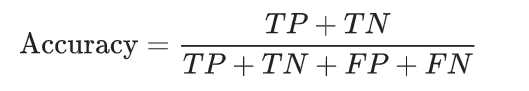

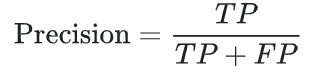

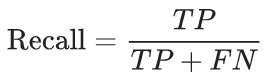

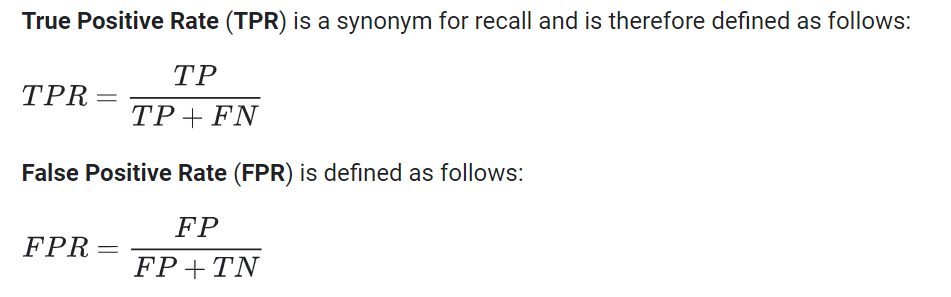

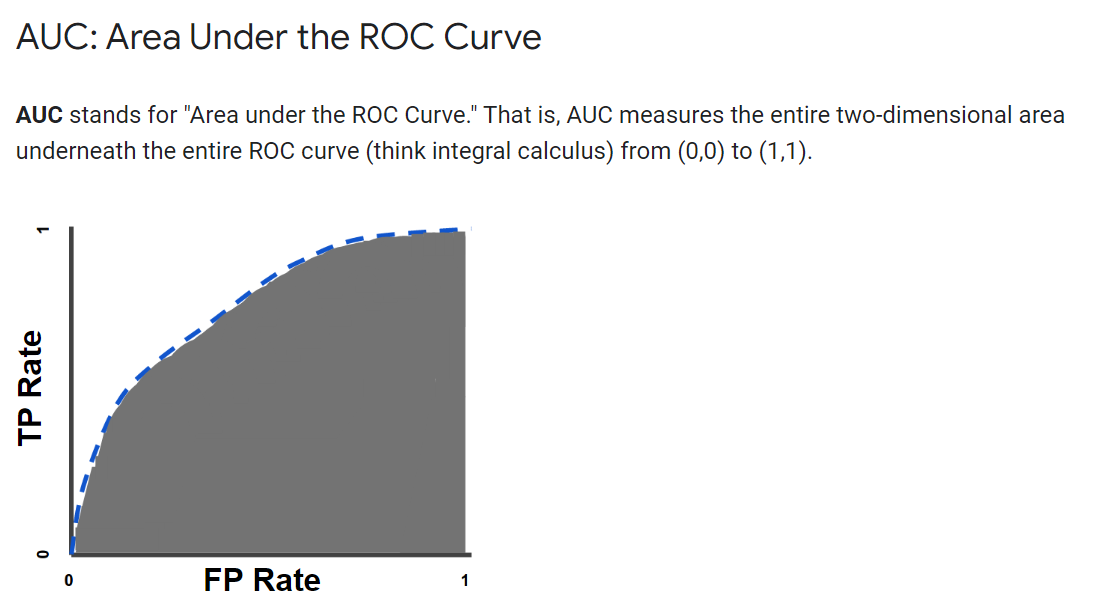

In [29]:
summeries['0']

,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,16781.6,216.712805,2791.4,100.479053,1045.4,100.400398,2503.7,216.820686,0.770994,0.857385,0.870176,0.863733,0.571321
Random forest,18783.7,59.299325,3562.6,23.139576,274.2,23.241342,501.6,59.267529,0.824229,0.840573,0.973991,0.902377,0.522728
Logistic regression,19285.3,0.458258,3836.8,0.400000,0.0,0.000000,0.0,0.000000,0.834064,0.834064,1.000000,0.909525,0.500000
Gradient Boosting,19267.2,11.461239,3824.7,7.785242,12.1,7.942921,18.1,11.344161,0.833804,0.834370,0.999061,0.909319,0.501108


In [30]:
summeries['1-3']


,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,1012.9,95.671783,2483.5,197.999621,16856.3,197.863109,2769.4,95.958533,0.772819,0.289698,0.267800,0.278319,0.569693
Random forest,269.1,22.237131,498.2,59.121570,18841.6,59.218578,3513.2,22.306053,0.826512,0.350710,0.071147,0.118296,0.522693
Logistic regression,0.0,0.000000,0.0,0.000000,19339.8,0.600000,3782.3,0.458258,0.836421,NaN,0.000000,NaN,0.500000
Gradient Boosting,12.1,7.942921,18.1,11.344161,19321.7,11.358257,3770.2,7.997500,0.836161,0.400662,0.003199,0.006348,0.501132


In [31]:
summeries['4-6']


,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,0.7,1.552417,42.4,55.190941,23027.4,54.783574,51.6,1.743560,0.995935,0.016241,0.013384,0.014675,0.505773
Random forest,0.5,1.204159,7.1,8.005623,23062.7,8.062878,51.8,1.400000,0.997453,0.065789,0.009560,0.016694,0.504626
Logistic regression,0.0,0.000000,0.0,0.000000,23069.8,0.600000,52.3,0.458258,0.997738,NaN,0.000000,NaN,0.500000
Gradient Boosting,0.0,0.000000,0.0,0.000000,23069.8,0.600000,52.3,0.458258,0.997738,NaN,0.000000,NaN,0.500000


In [32]:
summeries['7-10']


,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,0.0,0.0,0.0,0.0,23120.7,0.458258,1.4,0.489898,0.999939,NaN,0.0,NaN,0.500000
Random forest,0.0,0.0,0.9,2.7,23119.8,2.638181,1.4,0.489898,0.999901,0.0,0.0,NaN,0.499981
Logistic regression,0.0,0.0,0.0,0.0,23120.7,0.458258,1.4,0.489898,0.999939,NaN,0.0,NaN,0.500000
Gradient Boosting,0.0,0.0,0.0,0.0,23120.7,0.458258,1.4,0.489898,0.999939,NaN,0.0,NaN,0.500000


In [33]:
summeries['up10']


,Mean TP,sd TP,Mean FP,sd FP,Mean TN,sd TN,Mean FN,sd FN,Accuracy,Precision,Recall,F1_score,AUC
KNN,0.1,0.3,9.5,20.382591,23111.8,20.527055,0.7,0.458258,0.999559,0.010417,0.125,0.019231,0.562295
Random forest,0.0,0.0,0.0,0.000000,23121.3,0.458258,0.8,0.400000,0.999965,NaN,0.000,NaN,0.500000
Logistic regression,0.0,0.0,0.0,0.000000,23121.3,0.458258,0.8,0.400000,0.999965,NaN,0.000,NaN,0.500000
Gradient Boosting,0.0,0.0,0.0,0.000000,23121.3,0.458258,0.8,0.400000,0.999965,NaN,0.000,NaN,0.500000


In [34]:
print('knn_c_matrix:\n',knn_c_matrix,'\n')
print('rf_c_matrix:\n',rf_c_matrix,'\n')
print('lr_c_matrix:\n',lr_c_matrix,'\n')
print('gb_c_matrix:\n',gb_c_matrix,'\n')

knn_c_matrix:
 {'0': {'TN': [1148, 1215, 954, 962, 887, 1020, 975, 1031, 1113, 1149], 'FP': [2689, 2621, 2882, 2875, 2950, 2817, 2862, 2806, 2724, 2688], 'FN': [2792, 2396, 2558, 2130, 2866, 2370, 2668, 2280, 2433, 2544], 'TP': [16494, 16890, 16728, 17155, 16419, 16915, 16617, 17005, 16852, 16741]}, '1-3': {'TN': [16690, 16948, 16786, 17227, 16508, 16936, 16660, 17068, 16899, 16841], 'FP': [2651, 2392, 2554, 2112, 2831, 2403, 2680, 2272, 2441, 2499], 'FN': [2704, 2594, 2837, 2836, 2932, 2816, 2834, 2775, 2695, 2671], 'TP': [1078, 1188, 945, 947, 851, 967, 948, 1007, 1087, 1111]}, '4-6': {'TN': [22865, 23039, 23057, 23037, 23031, 23050, 23054, 23037, 23051, 23053], 'FP': [206, 31, 13, 33, 39, 20, 15, 32, 18, 17], 'FN': [47, 52, 52, 52, 52, 52, 53, 53, 53, 50], 'TP': [5, 0, 0, 0, 0, 0, 0, 0, 0, 2]}, '7-10': {'TN': [23121, 23121, 23121, 23121, 23121, 23121, 23121, 23120, 23120, 23120], 'FP': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'FN': [2, 1, 1, 1, 1, 1, 1, 2, 2, 2], 'TP': [0, 0, 0, 0, 0, 0, 0, 

In [35]:
st.mean([0, 0, 0, 0, 0, 4, 0, 0, 0, 1])
np.mean(rf_c_matrix['4-6']['TP'])

0.5

##### LOGISTIC REGRESSION FEATURE IMPORTANCE

Feature:CODE_GENDER,  Feature_num:0, Score: 0.08704
Feature:FLAG_OWN_CAR,  Feature_num:1, Score: 0.24331


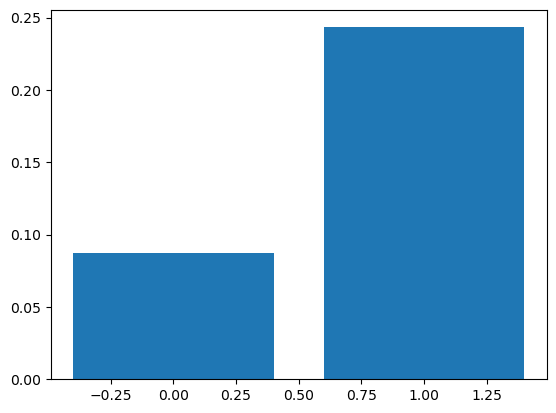

In [36]:
from matplotlib import pyplot

importance = lr_model.coef_[0]

# summarize feature importance
 
for i,v in enumerate(importance):
    print(f'Feature:{x.columns[i]},  Feature_num:%0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### GRADIENT BOOSTING FEATURE IMPORTANCE

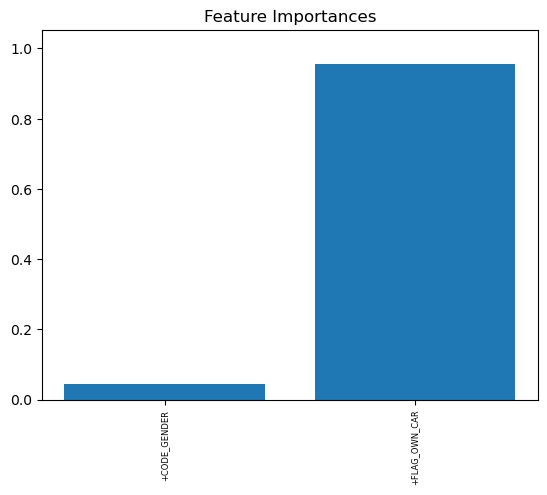

In [37]:
application_rec = application_rec.set_index(application_rec.columns[0])

# Compute feature importances
importances = gb_model.feature_importances_

# Create a list of feature names with negative or positive prefixes
prefixes = ['+' if i >= 0 else '-' for i in importances]
features = [f"{prefixes[i]}{application_rec.columns[i]}" for i in range(len(importances))]

# Plot feature importances
num_features = len(importances)
plt.bar(range(num_features), importances)
plt.xticks(range(num_features), features, rotation=90, fontsize=6)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.title("Feature Importances")
plt.ylim([0, max(importances) * 1.1])
plt.show()

##### RANDOM FOREST FEATURE IMPORTANCE

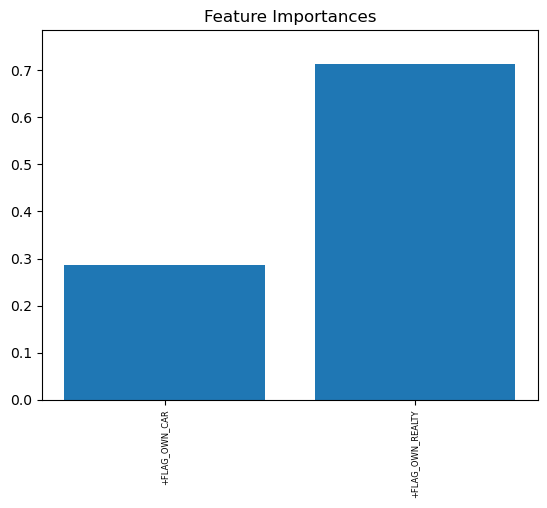

In [38]:
application_rec = application_rec.set_index(application_rec.columns[0])

import numpy as np
import matplotlib.pyplot as plt

# Compute feature importances
importances = rf_model.feature_importances_

# Create a list of feature names with negative or positive prefixes
prefixes = ['+' if i >= 0 else '-' for i in importances]
features = [f"{prefixes[i]}{application_rec.columns[i]}" for i in range(len(importances))]

# Plot feature importances
num_features = len(importances)
plt.bar(range(num_features), importances)
plt.xticks(range(num_features), features, rotation=90, fontsize=6)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.title("Feature Importances")
plt.ylim([0, max(importances) * 1.1])
plt.show()

In [39]:
# Compute feature importances
importances = rf_model.feature_importances_

# Create a list of feature names with negative or positive prefixes
prefixes = ['+' if i >= 0 else '-' for i in importances]
features = [f"{prefixes[i]}{application_rec.columns[i]}" for i in range(len(importances))]

# Print importance scores for each feature
for i, imp in enumerate(importances):
    print(f"{features[i]}: {imp}")

+FLAG_OWN_CAR: 0.2864101320693701
+FLAG_OWN_REALTY: 0.71358986793063


In [40]:
#filtered_df.to_csv("Moderate_days0_after_encoding.csv")
#Summary.to_csv("Moderate_days0_summary_encoding.csv")